In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("BlackFriday.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.shape

(537577, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
df.describe().round(2)

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,537577.00,537577.00,537577.00,537577.00,370591.00,164278.00,537577.00
mean,1002991.85,8.08,0.41,5.30,9.84,12.67,9333.86
std,1714.39,6.52,0.49,3.75,5.09,4.12,4981.02
min,1000001.00,0.00,0.00,1.00,2.00,3.00,185.00
25%,1001495.00,2.00,0.00,1.00,5.00,9.00,5866.00
50%,1003031.00,7.00,0.00,5.00,9.00,14.00,8062.00
75%,1004417.00,14.00,1.00,8.00,15.00,16.00,12073.00
max,1006040.00,20.00,1.00,18.00,18.00,18.00,23961.00


## "Here we can find the most orders placed by gender (male or female)."

## 1.Gender

In [7]:
gender_analysis = df.groupby("Gender",as_index=False)["User_ID"].agg("count")

In [8]:
gender_analysis

,Gender,User_ID
0,F,132197
1,M,405380


<BarContainer object of 2 artists>

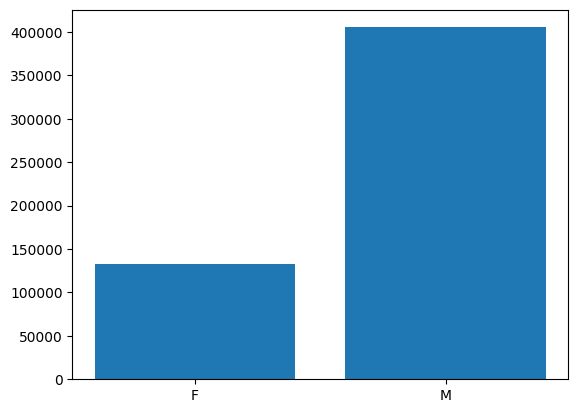

In [9]:
plt.bar(gender_analysis.Gender,gender_analysis.User_ID)

In [10]:
gender_analysis.keys

<bound method NDFrame.keys of   Gender  User_ID
0      F   132197
1      M   405380>

In [11]:
a = gender_analysis.values

In [12]:
gender_analysis = df.groupby("Gender")["User_ID"].agg(["count"])

In [13]:
gender_analysis

,count
Gender,
F,132197
M,405380


array([<Axes: ylabel='count'>], dtype=object)

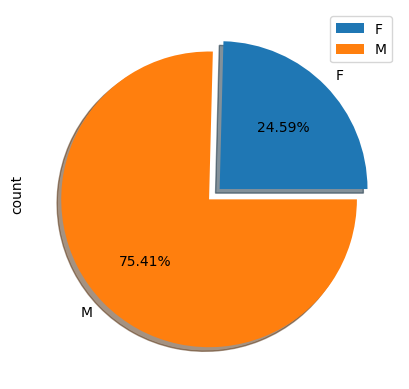

In [14]:
gender_analysis.plot(
    kind = "pie",
    autopct ="%1.2f%%",
    subplots = True,explode = (0.05,0.05),shadow = True)

## 2. Age

In [15]:
Age_analysis = df.groupby("Age",as_index=False)["User_ID"].agg("count")

In [16]:
Age_analysis

,Age,User_ID
0,0-17,14707
1,18-25,97634
2,26-35,214690
3,36-45,107499
4,46-50,44526
5,51-55,37618
6,55+,20903


<BarContainer object of 7 artists>

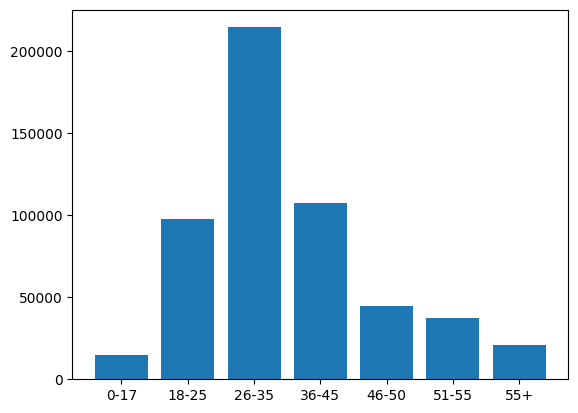

In [17]:
plt.bar(Age_analysis.Age,Age_analysis.User_ID)

In [18]:
result = df.pivot_table(
    index = 'Age',
    columns = "Gender",
    values = "User_ID",
    aggfunc = ['count']
)


In [19]:
result

count        
Gender      F       M
Age                  
0-17     4953    9754
18-25   24057   73577
26-35   49348  165342
36-45   26420   81079
46-50   12856   31670
51-55    9634   27984
55+      4929   15974

<Axes: xlabel='Age'>

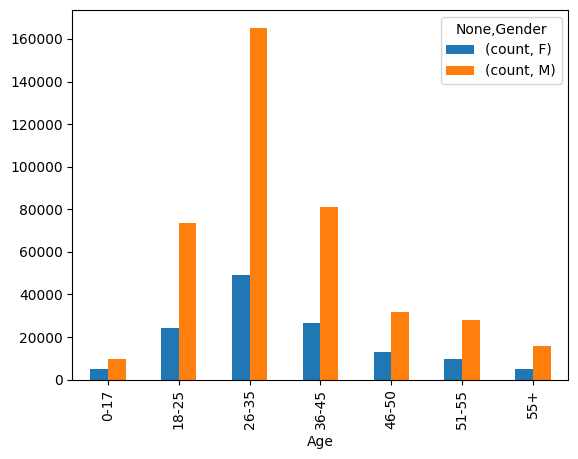

In [20]:
result.plot(
    kind = "bar",
)

In [21]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## 3. CITY

In [22]:
result1 = df.groupby("City_Category")["User_ID"].agg(["count"])

In [23]:
result1

,count
City_Category,
A,144638
B,226493
C,166446


array([<Axes: ylabel='count'>], dtype=object)

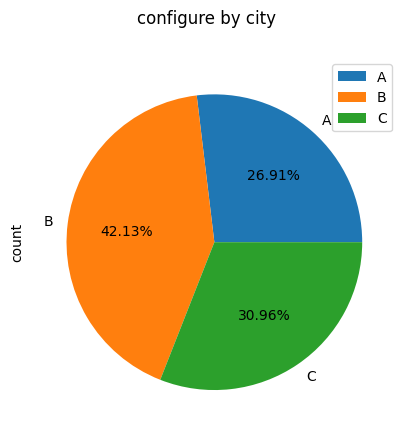

In [24]:
result1.plot(
    kind = "pie",
    autopct ="%1.2f%%",
    subplots = True,
    title = "configure by city")

In [25]:
result2 = df.pivot_table(
    index = 'City_Category',
    columns = "Age",
    values = "User_ID",
    aggfunc = ['count']
)

In [26]:
result2

count                                          
Age            0-17  18-25  26-35  36-45  46-50  51-55    55+
City_Category                                                
A              2497  27025  72048  26142   7467   5969   3490
B              5288  42470  89767  46605  19900  17435   5028
C              6922  28139  52875  34752  17159  14214  12385

<Axes: title={'center': 'How many orders placed by ages  in different citeies'}, xlabel='City_Category'>

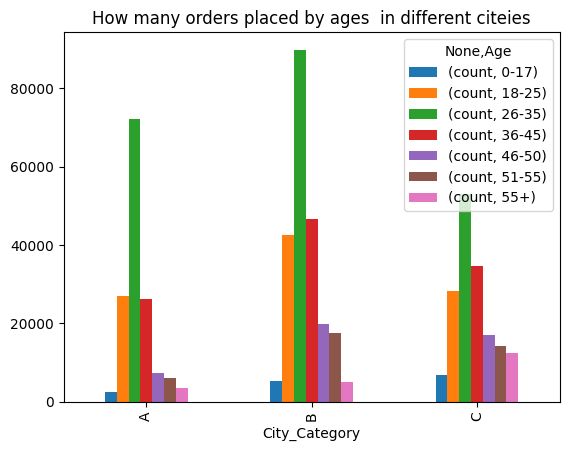

In [27]:
result2.plot(
    kind = "bar",
    title = "How many orders placed by ages  in different citeies")

## 4.City_Category

In [28]:
result3 = df.groupby("City_Category")["Purchase"].sum()

In [29]:
result3

City_Category
A    1295668797
B    2083431612
C    1638567969
Name: Purchase, dtype: int64

array([<Axes: ylabel='Purchase'>], dtype=object)

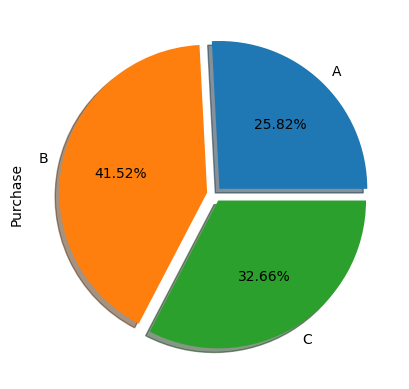

In [30]:
result3.plot(kind = "pie", autopct = "%1.2f%%",subplots =True, explode = (0.05,0.05,0.05),shadow = True)

In [31]:
result4 = df.groupby("Stay_In_Current_City_Years")["Purchase"].sum()

In [32]:
result4

Stay_In_Current_City_Years
0      672505429
1     1763243917
2      934676626
3      872531130
4+     774711276
Name: Purchase, dtype: int64

array([<Axes: ylabel='Purchase'>], dtype=object)

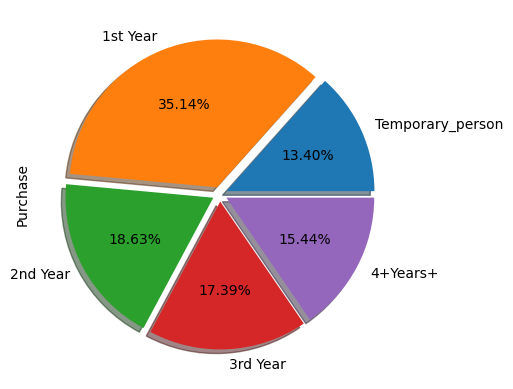

In [33]:
label = ["Temporary_person","1st Year","2nd Year","3rd Year","4+Years+"]
result4.plot(kind = "pie", autopct = "%1.2f%%",labels = label,subplots =True, explode = (0.05,0.05,0.05,0.05,0.05),shadow = True)

In [34]:
result5 = df.groupby("Stay_In_Current_City_Years",as_index = False)["Purchase"].sum()

In [35]:
result5

,Stay_In_Current_City_Years,Purchase
0,0,672505429
1,1,1763243917
2,2,934676626
3,3,872531130
4,4+,774711276


<Axes: >

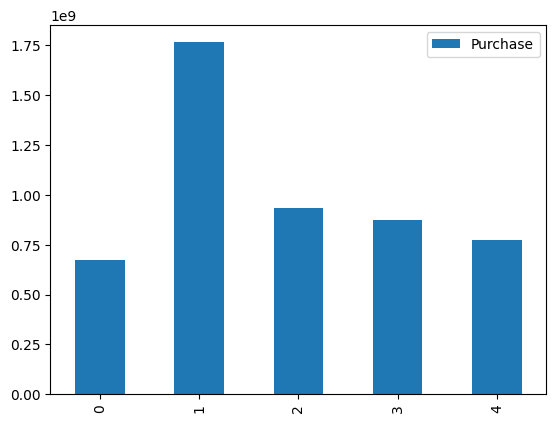

In [36]:
result5.plot(
    kind = "bar",
  )

## 5.Occupation

In [37]:
result6 = df.groupby("Occupation",as_index = False)["Occupation"].agg(["count"]).sort_values(by = "count")

In [38]:
result6

,Occupation,count
8,8,1524
9,9,6153
18,18,6525
13,13,7548
19,19,8352
11,11,11338
15,15,11812
5,5,11985
10,10,12623
3,3,17366


<Axes: >

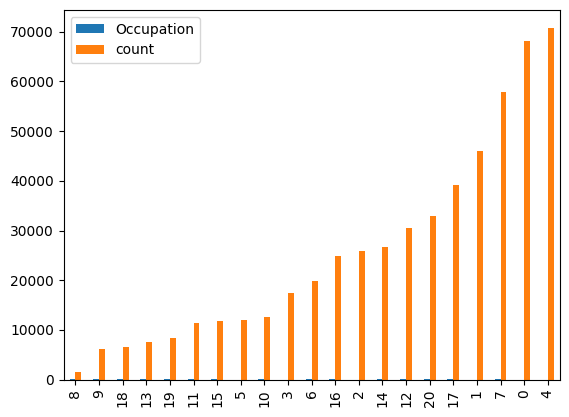

In [39]:
result6.plot(
    kind = "bar",
  )

In [40]:
result7 = df.groupby("Occupation",as_index = False)["Purchase"].sum().sort_values(by ="Purchase")

In [41]:
result7


,Occupation,Purchase
8,8,14594599
9,9,53619309
18,18,60249706
13,13,71135744
19,19,73115489
11,11,105437359
5,5,112525355
10,10,114273954
15,15,116540026
3,3,160428450


<Axes: >

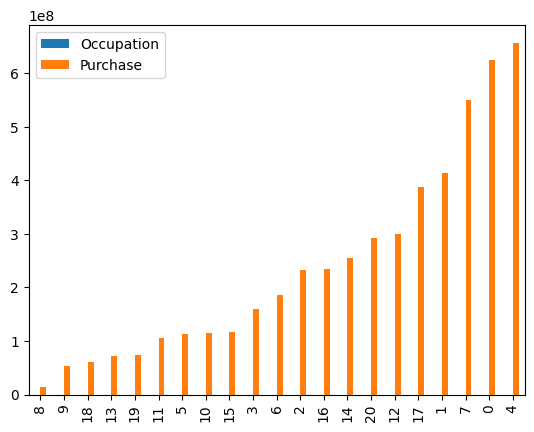

In [42]:
result7.plot(
    kind = "bar",
  )

In [43]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [44]:
df.Product_ID

0         P00069042
1         P00248942
2         P00087842
3         P00085442
4         P00285442
            ...    
537572    P00193542
537573    P00111142
537574    P00345942
537575    P00285842
537576    P00118242
Name: Product_ID, Length: 537577, dtype: object

## 6-Products and Catiegories


<Axes: >

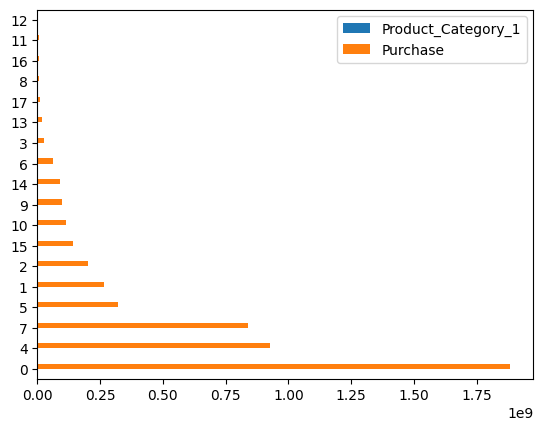

In [45]:
df.groupby("Product_Category_1",as_index = False)["Purchase"].sum().sort_values(by = "Purchase",ascending = False).plot(kind = "barh")

<Axes: >

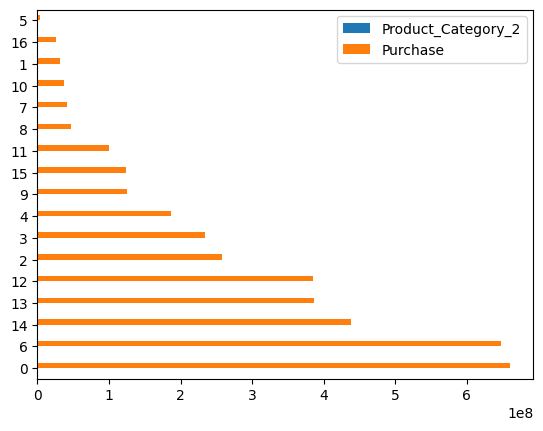

In [46]:
df.groupby("Product_Category_2",as_index = False)["Purchase"].sum().sort_values(by = "Purchase",ascending = False).plot(kind = "barh")

<Axes: >

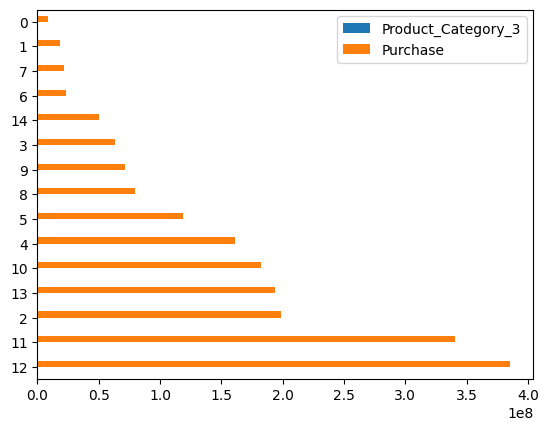

In [47]:
df.groupby("Product_Category_3",as_index = False)["Purchase"].sum().sort_values(by = "Purchase",ascending = False).plot(kind = "barh")

<Axes: >

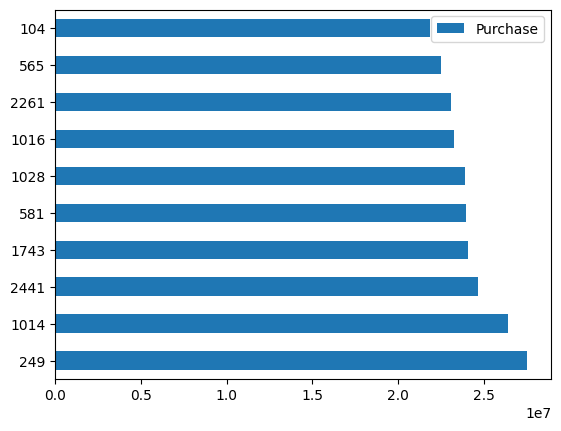

In [48]:
df.groupby("Product_ID",as_index = False)["Purchase"].sum().sort_values(by ="Purchase", ascending = False).head(10).plot(kind = "barh")